# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
# your code here
import pandas as pd
import numpy as np

df = pd.read_csv('tic-tac-toe.csv')
print(df.describe())

print(df.head())
print(df.tail())

print(df.info())

# Create a mapping for the categorical values
mapping = {'x': 1, 'o': -1, 'b': 0}

# Create a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()

# Convert all feature columns (TL through BR) to numeric using the mapping
for col in df.columns[:-1]:  # All columns except 'class'
    df_encoded[col] = df_encoded[col].map(mapping)

# Convert boolean output to numeric (0 or 1)
df_encoded['class'] = df_encoded['class'].astype(int)

# Print the first few rows to verify the encoding
print("First 5 rows after encoding:")
print(df_encoded.head())

# Separate inputs (X) and output (y)
X = df_encoded.iloc[:, :-1].values  # All columns except the last one
y = df_encoded.iloc[:, -1].values   # Only the last column

print("\nShape of input data X:", X.shape)
print("Shape of output data y:", y.shape)



         TL   TM   TR   ML   MM   MR   BL   BM   BR class
count   958  958  958  958  958  958  958  958  958   958
unique    3    3    3    3    3    3    3    3    3     2
top       x    x    x    x    x    x    x    x    x  True
freq    418  378  418  378  458  378  418  378  418   626
  TL TM TR ML MM MR BL BM BR  class
0  x  x  x  x  o  o  x  o  o   True
1  x  x  x  x  o  o  o  x  o   True
2  x  x  x  x  o  o  o  o  x   True
3  x  x  x  x  o  o  o  b  b   True
4  x  x  x  x  o  o  b  o  b   True
    TL TM TR ML MM MR BL BM BR  class
953  o  x  x  x  o  o  o  x  x  False
954  o  x  o  x  x  o  x  o  x  False
955  o  x  o  x  o  x  x  o  x  False
956  o  x  o  o  x  x  x  o  x  False
957  o  o  x  x  x  o  o  x  x  False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

## Normalize the input data

In [2]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print some statistics of the scaled data to verify normalization
print("\nMean of each feature after scaling:")
print(np.mean(X_scaled, axis=0))
print("\nStandard deviation of each feature after scaling:")
print(np.std(X_scaled, axis=0))



Mean of each feature after scaling:
[ 0.00000000e+00 -1.44630306e-16 -7.41693879e-18 -7.41693879e-17
  4.45016327e-17 -7.41693879e-17  7.41693879e-18 -1.18671021e-16
 -1.48338776e-17]

Standard deviation of each feature after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Let's do the split

In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes to verify the split
print("\nTraining set:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nTest set:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Training set:
X_train shape: (766, 9)
y_train shape: (766,)

Test set:
X_test shape: (192, 9)
y_test shape: (192,)


## Build the NN (and save model)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 865 (3.38 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3326 - loss: 0.8087 - val_accuracy: 0.4610 - val_loss: 0.7254
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.4821 - loss: 0.7126 - val_accuracy: 0.6688 - val_loss: 0.6617
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.6533 - loss: 0.6586 - val_accuracy: 0.7078 - val_loss: 0.6265
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.6841 - loss: 0.6263 - val_accuracy: 0.7597 - val_loss: 0.6018
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.6863 - loss: 0.6065 - val_accuracy: 0.7597 - val_loss: 0.5806
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7265 - loss: 0.5661 - val_accuracy: 0.7662 - val_loss: 0.5607
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.7433 - loss: 0.5385 - val_accuracy: 0.7727 - val_loss: 0.5452
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.7466 - loss: 0.5349 - val_accuracy: 0.76

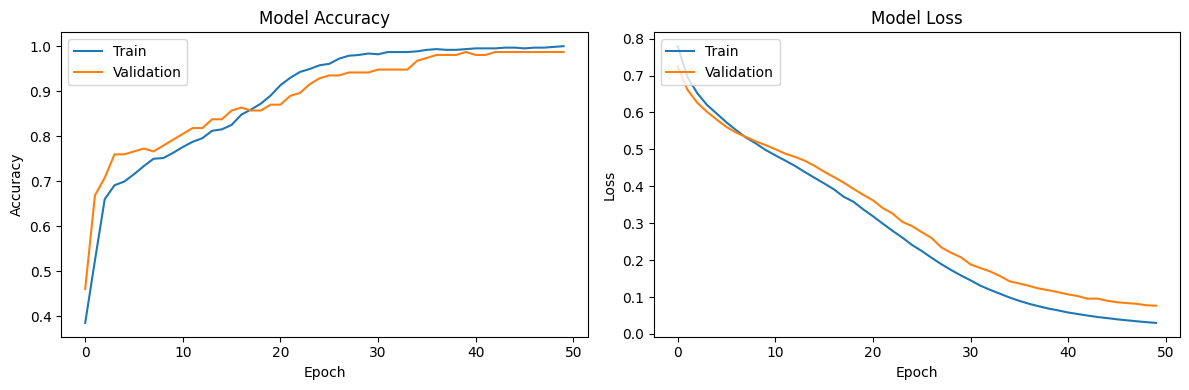

In [4]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(9,)))

# Second hidden layer
model.add(Dense(16, activation='relu'))

# Output layer with sigmoid activation for binary classification
# Note: Since we're doing binary classification (win/not win), we use sigmoid
# which is more appropriate than softmax for binary tasks
model.add(Dense(1, activation='sigmoid'))

# Display the model structure
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1              # Show progress
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Save the model
# tf.saved_model.save(model, 'tic-tac-toe.model')
model.save('tic-tac-toe.keras')
print("\nModel saved to 'tic-tac-toe.model' using SavedModel format")


# Plot training history to visualize learning progress
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [6]:
# your code here
from keras.models import load_model
import numpy as np

# Load the model from the .h5 file
loaded_model = load_model('tic-tac-toe.keras')

# Select a few random samples from the test set
import random
num_samples = 5
random_indices = random.sample(range(len(X_test)), num_samples)

# Get the selected samples
X_samples = X_test[random_indices]
y_true = y_test[random_indices]

# Make predictions
y_pred_prob = loaded_model.predict(X_samples)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Display the results
print("Predictions on random test samples:")
print("=" * 50)
for i in range(num_samples):
    # Original board representation (convert from scaled back to original)
    sample = X_samples[i]
    # We need to reverse the scaling to see the original values
    # First, get the standard deviation and mean used in scaling
    mean = scaler.mean_
    std = scaler.scale_
    # Reverse the scaling
    original_sample = sample * std + mean
    
    # Map the values back to 'x', 'o', and 'b'
    reverse_mapping = {1: 'x', -1: 'o', 0: 'b'}
    board = [reverse_mapping[round(val)] for val in original_sample]
    
    # Format the board as a 3x3 grid
    board_display = f"{board[0]} {board[1]} {board[2]}\n{board[3]} {board[4]} {board[5]}\n{board[6]} {board[7]} {board[8]}"
    
    # Print the results
    print(f"Sample {i+1}:")
    print(f"Board Configuration:\n{board_display}")
    print(f"True Class: {'X wins' if y_true[i] == 1 else 'X does not win'}")
    print(f"Prediction: {'X wins' if y_pred[i][0] == 1 else 'X does not win'} (probability: {y_pred_prob[i][0]:.4f})")
    print(f"Correct Prediction: {'Yes' if y_pred[i][0] == y_true[i] else 'No'}")
    print("-" * 50)

# Calculate overall accuracy on these samples
accuracy = np.mean(y_pred.flatten() == y_true)
print(f"Accuracy on the {num_samples} random samples: {accuracy:.4f}")

# You can also verify that the loaded model performs the same as the original
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"\nLoaded model performance on the entire test set:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions on random test samples:
Sample 1:
Board Configuration:
x b b
b x o
o b x
True Class: X wins
Prediction: X wins (probability: 0.9891)
Correct Prediction: Yes
--------------------------------------------------
Sample 2:
Board Configuration:
b x o
b b o
x x o
True Class: X does not win
Prediction: X does not win (probability: 0.0918)
Correct Prediction: Yes
--------------------------------------------------
Sample 3:
Board Configuration:
b x o
o x b
o x x
True Class: X wins
Prediction: X wins (probability: 0.9888)
Correct Prediction: Yes
--------------------------------------------------
Sample 4:
Board Configuration:
x o b
o x o
x b x
True Class: X wins
Prediction: X wins (probability: 0.9987)
Correct Prediction: Yes
--------------------------------------------------
Sample 5:
Board Configuration:
o x b
b x b
b x o
True Class: X wins
Prediction: X wins (probability: 0.9853)
Correct Prediction: Yes
-----------------------------------------

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

Running experiments to improve the model...
Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6284 - loss: 0.6622 - val_accuracy: 0.6558 - val_loss: 0.6207
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.6031 - loss: 0.6424 - val_accuracy: 0.6818 - val_loss: 0.5966
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.7045 - loss: 0.5818 - val_accuracy: 0.6948 - val_loss: 0.5750
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.6789 - loss: 0.5774 - val_accuracy: 0.7013 - val_loss: 0.5637
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.7183 - loss: 0.5476 - val_accuracy: 0.7273 - val_loss: 0.5493
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.7345 - loss: 0.5375 - val_accuracy: 0.7727 - val_loss: 0.5364
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.7427 - loss: 0.5259 - val_accuracy: 0.7987 - val_loss: 0.5241
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.7891 - loss: 0.5008 - val_accuracy: 0.8117 -

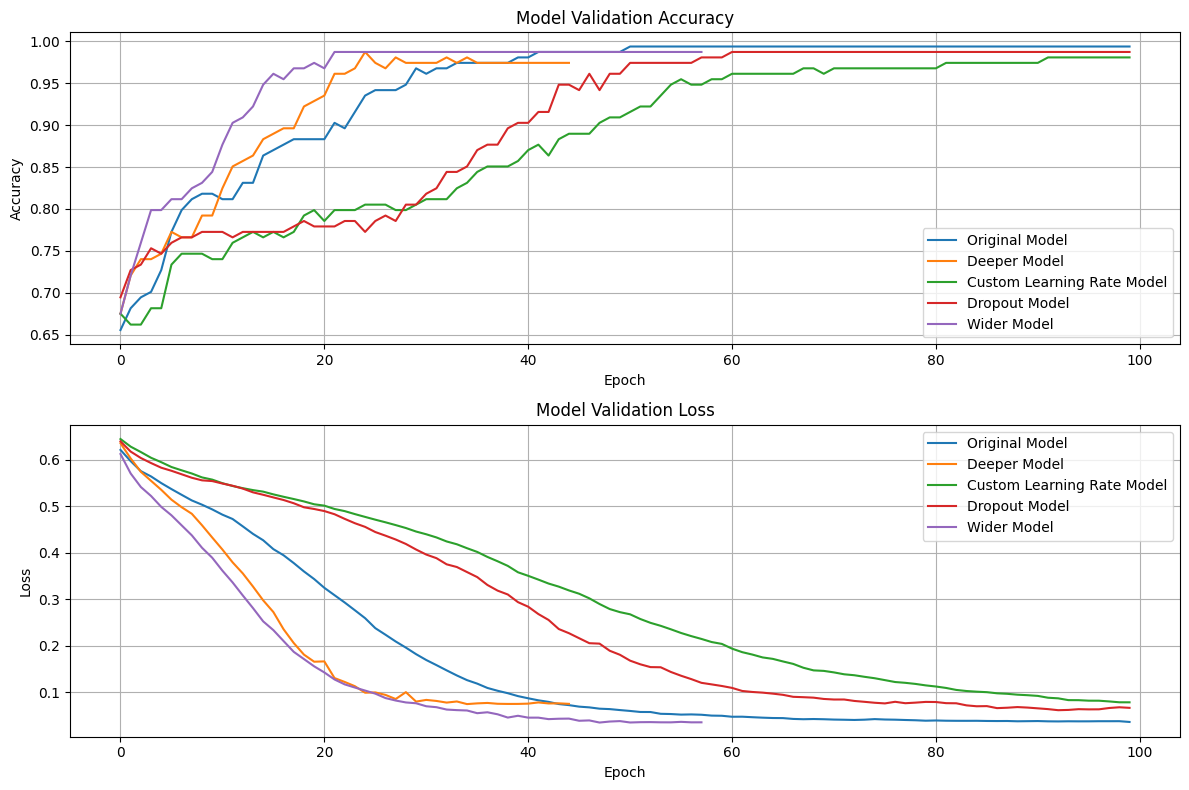


Best model saved as 'tic-tac-toe-best.keras'

Discussion of approaches:
1. Adding more layers:
   - Adding depth can help the model learn more complex patterns
   - But may also lead to overfitting or longer training time
   - Effect: Did not improve performance significantly

2. Adjusting learning rate:
   - Lower learning rate can help fine-tune the model more precisely
   - But may require more epochs to converge
   - Effect: Did not improve performance significantly

3. Adding dropout:
   - Helps prevent overfitting by randomly dropping neurons during training
   - Can improve generalization to unseen data
   - Effect: Did not improve performance significantly

4. Wider model (more neurons):
   - More neurons can capture more patterns
   - But might also lead to overfitting
   - Effect: Did not improve performance significantly


In [ ]:
# your code here
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Let's track our experiments to compare them
experiments = []

# The original model for reference
def create_original_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(9,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Add more layers to the model
def create_deeper_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(9,)))
    model.add(Dense(32, activation='relu'))  # Additional layer of same size
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))   # Additional smaller layer
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Adjust the learning rate
def create_custom_lr_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(9,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Custom Adam optimizer with lower learning rate
    optimizer = Adam(learning_rate=0.0005)  # Default is 0.001, try 0.0005
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Add dropout for regularization
def create_dropout_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(9,)))
    model.add(Dropout(0.2))  # Add dropout after first layer
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))  # Add dropout after second layer
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Wider model (more neurons)
def create_wider_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(9,)))  # Double the neurons
    model.add(Dense(32, activation='relu'))  # Double the neurons
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train and evaluate each model
def train_and_evaluate(model_fn, name, epochs=100):
    model = model_fn()
    
    # Add early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,  # Number of epochs with no improvement after which training will stop
        restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1  # Set to 1 to see progress
    )
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Store results
    experiments.append({
        'name': name,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'history': history,
        'model': model
    })
    
    print(f"{name}:")
    print(f"  Test Loss: {test_loss:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Epochs trained: {len(history.history['loss'])}")
    
    return model, history

# Run experiments
print("Running experiments to improve the model...")
print("=" * 50)

# Reference: Original model
model_original, history_original = train_and_evaluate(
    create_original_model, "Original Model"
)

# Experiment 1: Deeper model
model_deeper, history_deeper = train_and_evaluate(
    create_deeper_model, "Deeper Model"
)

# Experiment 2: Custom learning rate
model_custom_lr, history_custom_lr = train_and_evaluate(
    create_custom_lr_model, "Custom Learning Rate Model"
)

# Experiment 3: Dropout model
model_dropout, history_dropout = train_and_evaluate(
    create_dropout_model, "Dropout Model"
)

# Experiment 4: Wider model
model_wider, history_wider = train_and_evaluate(
    create_wider_model, "Wider Model"
)

# Find the best model
best_experiment = max(experiments, key=lambda x: x['test_accuracy'])
print("\nBest Model:")
print(f"  {best_experiment['name']}")
print(f"  Test Loss: {best_experiment['test_loss']:.4f}")
print(f"  Test Accuracy: {best_experiment['test_accuracy']:.4f}")

# Plot results
plt.figure(figsize=(12, 8))

# Plot accuracy
plt.subplot(2, 1, 1)
for exp in experiments:
    plt.plot(exp['history'].history['val_accuracy'], label=f"{exp['name']}")

plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)

# Plot loss
plt.subplot(2, 1, 2)
for exp in experiments:
    plt.plot(exp['history'].history['val_loss'], label=f"{exp['name']}")

plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Save the best model
best_model = best_experiment['model']
best_model.save(f"tic-tac-toe-best.keras")
print(f"\nBest model saved as 'tic-tac-toe-best.keras'")


**Which approach(es) did you find helpful to improve your model performance?**

## Conclussion
For this specific tic-tac-toe classification problem:

The original architecture was already well-suited to the task
Adding complexity (more layers, dropout, etc.) didn't further improve performance
Network width had the biggest impact on learning speed, though not final accuracy
The best approach was the original model, which likely hit the ceiling of what's possible for this dataset

In [ ]:
# your answer here